## One of the aspects seattle is most notable for is its rains.We have data from January 1,1948 to December 12,2017 and this dataset provides full records of Seattles daily rainfall patterns. We will build a predictive model to detect the possibility of rains on a given day.

In [24]:
###import packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [26]:
##loading the dataset:
data=pd.read_csv('seattleweather1948-2017.csv')
print('data is loaded')

data is loaded


In [28]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [32]:
data.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [34]:
####records having missing values for precipitation:
data[data['PRCP'].isna()]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [36]:
####drop the rows with missing values:
#data.dropna(inplace=True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [40]:
###checking for removal of missing values:
data.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [19]:
####Q) Impute the missing values for 'PRCP' and 'RAIN' instead of dropping them.

In [42]:
data['PRCP']=data['PRCP'].fillna(data['PRCP'].median())

In [44]:
data.isna().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [46]:
######checking the imputation of PRCP values:
data.iloc[18416,:]

DATE    1998-06-03
PRCP           0.0
TMAX            66
TMIN            51
RAIN           NaN
Name: 18416, dtype: object

In [29]:
data['PRCP'].median()

0.0

In [48]:
##### category with highest frequency:
data.RAIN.value_counts()

RAIN
False    14648
True     10900
Name: count, dtype: int64

In [33]:
#######imputing the missing values for RAIN:


In [50]:
data['RAIN']=data['RAIN'].fillna(data['RAIN'].mode()[0])

In [37]:
##checking
data.iloc[21067,:]

DATE    2005-09-05
PRCP           0.0
TMAX            70
TMIN            52
RAIN         False
Name: 21067, dtype: object

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [54]:
###encoding the RAIN variable:
data['RAIN']=le.fit_transform(data['RAIN'])

In [56]:
data.head(20)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1
5,1948-01-06,0.44,48,39,1
6,1948-01-07,0.41,50,40,1
7,1948-01-08,0.04,48,35,1
8,1948-01-09,0.12,50,31,1
9,1948-01-10,0.74,43,34,1


In [66]:
####EDA:
import seaborn as sns


In [64]:
pip install --upgrade seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


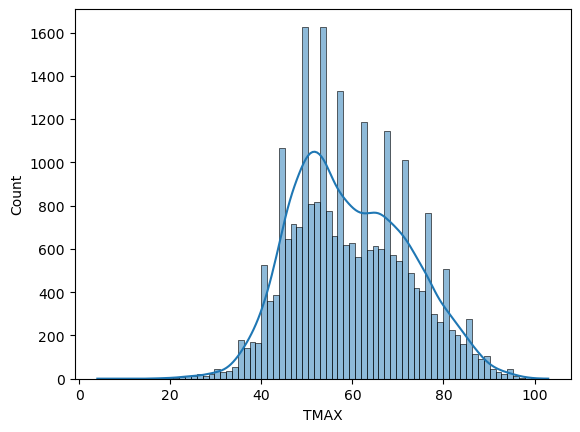

In [68]:
sns.histplot(data['TMAX'],kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


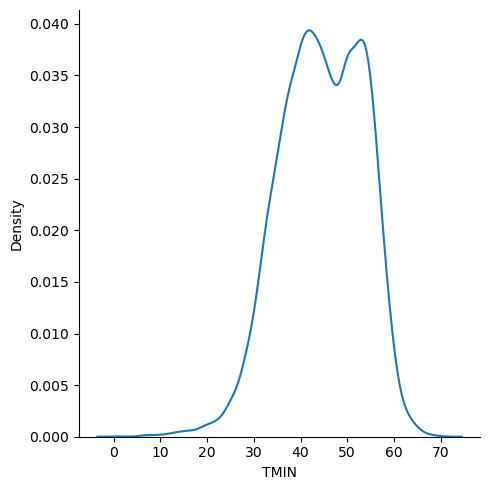

In [70]:
sns.displot(data['TMIN'],kind='kde')
plt.show()

In [51]:
#### By assumptions in statistics,all continuous variables should follow a normal distribution,if the distribution is not normal
#### but skewed,it indicates the presence of outliers.

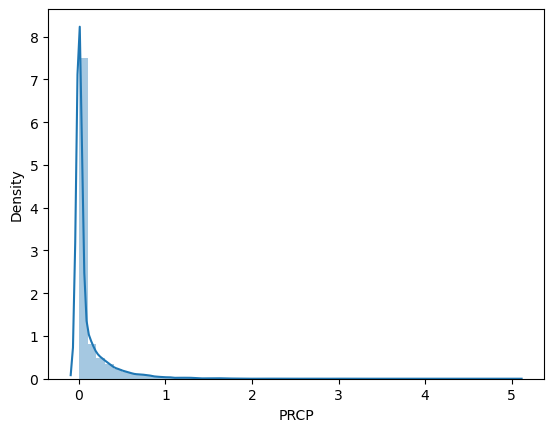

In [72]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(data['PRCP'])
plt.show()

In [74]:
data.describe()

,PRCP,TMAX,TMIN,RAIN
count,25551.000000,25551.000000,25551.000000,25551.000000
mean,0.106209,59.544206,44.514226,0.426598
std,0.239020,12.772984,8.892836,0.494592
min,0.000000,4.000000,0.000000,0.000000
25%,0.000000,50.000000,38.000000,0.000000
50%,0.000000,58.000000,45.000000,0.000000
75%,0.100000,69.000000,52.000000,1.000000
max,5.020000,103.000000,71.000000,1.000000


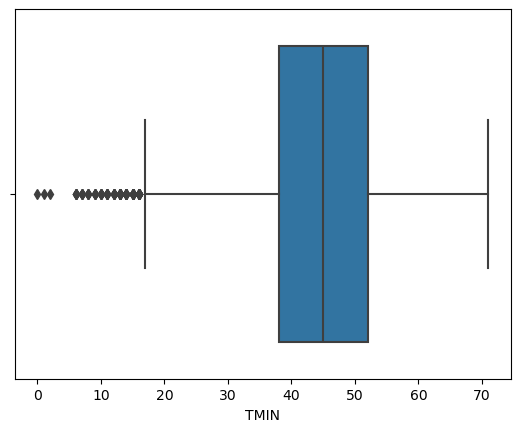

In [76]:
sns.boxplot(x=data['TMIN'])
plt.show()

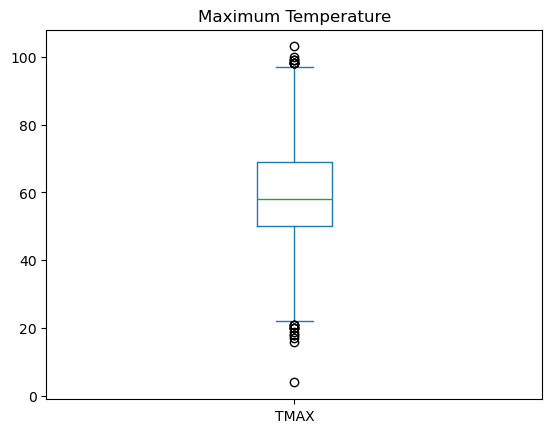

In [78]:
data['TMAX'].plot(kind='box',title='Maximum Temperature')
plt.show()

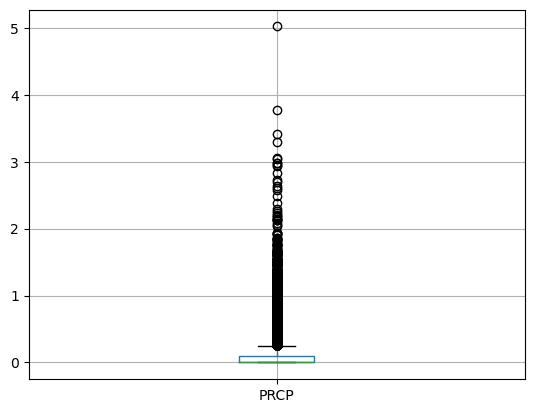

In [80]:
data.boxplot(column='PRCP')
plt.show()

In [82]:
data.describe()

,PRCP,TMAX,TMIN,RAIN
count,25551.000000,25551.000000,25551.000000,25551.000000
mean,0.106209,59.544206,44.514226,0.426598
std,0.239020,12.772984,8.892836,0.494592
min,0.000000,4.000000,0.000000,0.000000
25%,0.000000,50.000000,38.000000,0.000000
50%,0.000000,58.000000,45.000000,0.000000
75%,0.100000,69.000000,52.000000,1.000000
max,5.020000,103.000000,71.000000,1.000000


In [86]:
#####define a function for outlier removal:
def outlier_removal(data,col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    data=data.loc[~((data[col]<(Q1-1.5*IQR))|(data[col]>(Q3+1.5*IQR))),]
    return data

In [88]:
#####Cleaned data:
data=outlier_removal(data,'TMAX')

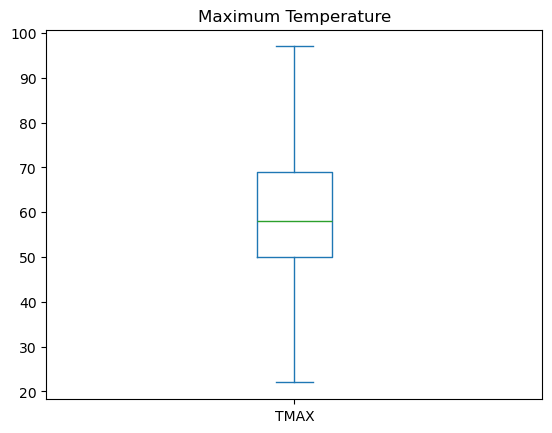

In [90]:
data['TMAX'].plot(kind='box',title='Maximum Temperature')
plt.show()

In [92]:
data.describe()

,PRCP,TMAX,TMIN,RAIN
count,25527.000000,25527.000000,25527.000000,25527.000000
mean,0.106243,59.548361,44.522388,0.426764
std,0.239003,12.718038,8.855202,0.494617
min,0.000000,22.000000,1.000000,0.000000
25%,0.000000,50.000000,38.000000,0.000000
50%,0.000000,58.000000,45.000000,0.000000
75%,0.100000,69.000000,52.000000,1.000000
max,5.020000,97.000000,69.000000,1.000000


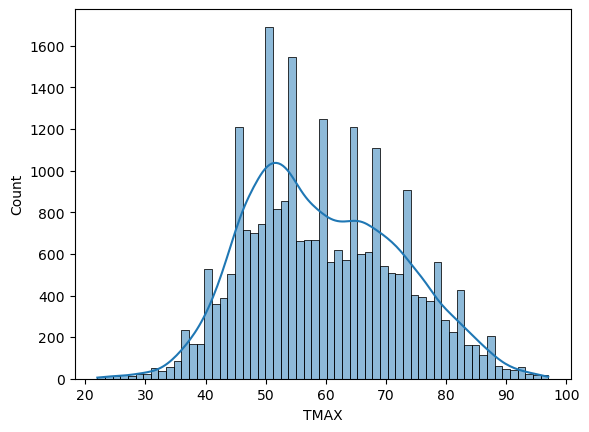

In [94]:
sns.histplot(data['TMAX'],kde=True)
plt.show()

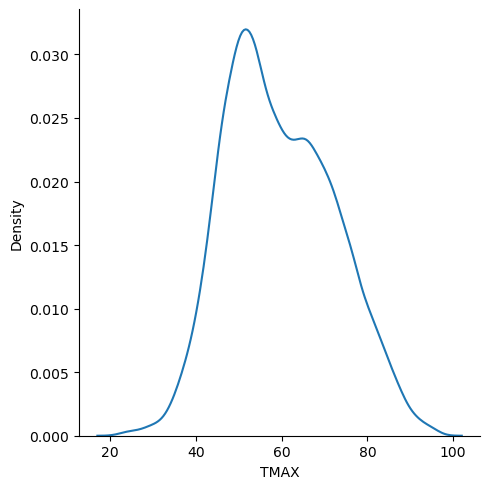

In [96]:
sns.displot(data['TMAX'],kind='kde')
plt.show()

In [ ]:
from

# User
from sklearn I need to split test and train data

# Assistant
To split your dataset into training and testing sets using `scikit-learn`, you can use the `train_test_split` function from the `sklearn.model_selection` module. This function allows you to specify the proportion of the dataset to include in the test split, among other parameters.

Here’s a step-by-step guide on how to do this:

1. **Import the necessary libraries**: You will need to import `train_test_split` from `sklearn.model_selection`.

2. **Prepare your dataset**: Ensure you have your features (X) and target labels (y) ready.

3. **Use `train_test_split`**: Call the function with your features and labels, specifying the test size and random state if needed.

Here’s a code example that demonstrates these steps:


In [103]:
# Prepare features and target variable
X = data[['PRCP', 'TMAX', 'TMIN']]  # Features
y = data['RAIN']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the results
print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("y_train:\n", y_train)
print("y_test:\n", y_test)

X_train:
        PRCP  TMAX  TMIN
11539  0.00    71    52
327    0.33    50    41
9495   0.00    43    34
18112  0.00    84    58
14561  0.58    53    42
...     ...   ...   ...
21597  0.13    58    44
5398   0.11    62    49
864    0.00    63    39
15815  0.00    72    44
23678  0.43    60    50

[20421 rows x 3 columns]
X_test:
        PRCP  TMAX  TMIN
4454   0.00    51    34
18205  0.00    59    42
23833  0.00    57    48
2200   0.06    44    37
6881   0.00    55    38
...     ...   ...   ...
22829  0.00    68    52
7278   0.12    44    35
8076   0.00    59    45
8501   0.09    48    36
6499   0.01    58    48

[5106 rows x 3 columns]
y_train:
 11539    0
327      1
9495     0
18112    0
14561    1
        ..
21597    1
5398     1
864      0
15815    0
23678    1
Name: RAIN, Length: 20421, dtype: int64
y_test:
 4454     0
18205    0
23833    0
2200     1
6881     0
        ..
22829    0
7278     1
8076     0
8501     1
6499     1
Name: RAIN, Length: 5106, dtype: int64



In this example:
- `test_size=0.2` means 20% of the data will be used for testing, and 80% will be used for training.
- `random_state=42` ensures that the split is reproducible.

You can adjust the `test_size` and `random_state` parameters as needed for your specific use case.

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [107]:
# Create and fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.927144535840188
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      2961
           1       1.00      0.83      0.91      2145

    accuracy                           0.93      5106
   macro avg       0.94      0.91      0.92      5106
weighted avg       0.93      0.93      0.93      5106



In [109]:
# Predict probabilities on the test set
probabilities = model.predict_proba(X_test)

# Output the predicted probabilities
# probabilities[:, 1] gives the probability of the positive class (RAIN = 1)
print("Predicted Probabilities:\n", probabilities)
print("Probabilities of the positive class (RAIN = 1):\n", probabilities[:, 1])

Predicted Probabilities:
 [[0.90121754 0.09878246]
 [0.8941388  0.1058612 ]
 [0.68595075 0.31404925]
 ...
 [0.83470216 0.16529784]
 [0.0784201  0.9215799 ]
 [0.62614404 0.37385596]]
Probabilities of the positive class (RAIN = 1):
 [0.09878246 0.1058612  0.31404925 ... 0.16529784 0.9215799  0.37385596]


In [113]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [119]:
#Calculate the coefficient of the model
model.coef_

array([[42.73780701, -0.16183192,  0.17146872]])

In [121]:
#Calculate the intercept of the model
model.intercept_

array([0.21266489])

In [125]:
#Confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


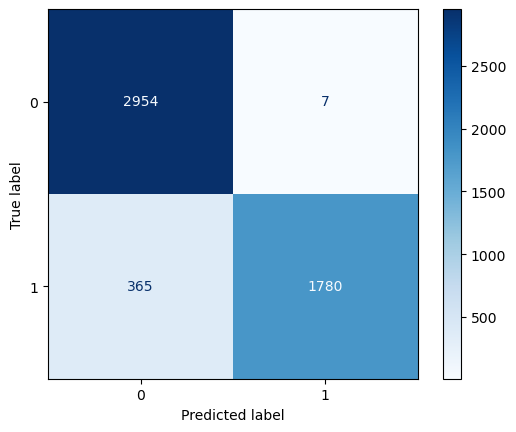

In [127]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')

In [133]:
X_new=[[0,47,51]]
pred_new=model.predict(X_new)
pred_new

array([1])

In [139]:
model.predict_proba(X_new)

array([[0.20563025, 0.79436975]])

#### Boxplots are used to summarise the data using 5 summaries-minimum,Q1,median and Q3 and maximum. It helps us understand the distribution of data,the central value,and the variability. It is one of the measures of Central tendency.